In [2]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

In [20]:
file = 'bb8f672d-593d-4820-b963-bc7ba00eae18.h5ad'
adata = sc.read_h5ad(file)

cell_types = adata.obs['cell_type']
print(cell_types)


EC3_AACCATGTCACGAAGG     mature microglial cell
EC3_AATCGGTCACTTACGA     mature microglial cell
EC3_ACAGCTAAGTGTCCCG     mature microglial cell
EC3_ACAGCTACAAGGACAC     mature microglial cell
EC3_ACAGCTAGTGATGTCT     mature microglial cell
                                  ...          
EC10_TTTCCTCGTGGTAACG    mature microglial cell
EC10_TTTCCTCGTTTGACAC    mature microglial cell
EC10_TTTCCTCTCACAGGCC    mature microglial cell
EC10_TTTGTCACAAGCGTAG    mature microglial cell
EC10_TTTGTCATCTATCGCC    mature microglial cell
Name: cell_type, Length: 5572, dtype: category
Categories (1, object): ['mature microglial cell']


In [21]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["microglial"] = adata.var_names.str.startswith("EC")

In [ ]:
sc.pp.calculate_qc_metrics(
    adata, inplace=True, log1p=True
)
print(adata.obs)

                      SampleID donor_id BraakStage SampleBatch    nUMI  nGene  \
EC3_AACCATGTCACGAAGG       EC3        3          0           C   219.0    193   
EC3_AATCGGTCACTTACGA       EC3        3          0           C   266.0    223   
EC3_ACAGCTAAGTGTCCCG       EC3        3          0           C   233.0    204   
EC3_ACAGCTACAAGGACAC       EC3        3          0           C   285.0    242   
EC3_ACAGCTAGTGATGTCT       EC3        3          0           C   959.0    699   
...                        ...      ...        ...         ...     ...    ...   
EC10_TTTCCTCGTGGTAACG     EC10       10          6           D  1010.0    710   
EC10_TTTCCTCGTTTGACAC     EC10       10          6           D  1355.0   1013   
EC10_TTTCCTCTCACAGGCC     EC10       10          6           D  1971.0   1358   
EC10_TTTGTCACAAGCGTAG     EC10       10          6           D   403.0    342   
EC10_TTTGTCATCTATCGCC     EC10       10          6           D   444.0    393   

                      initi

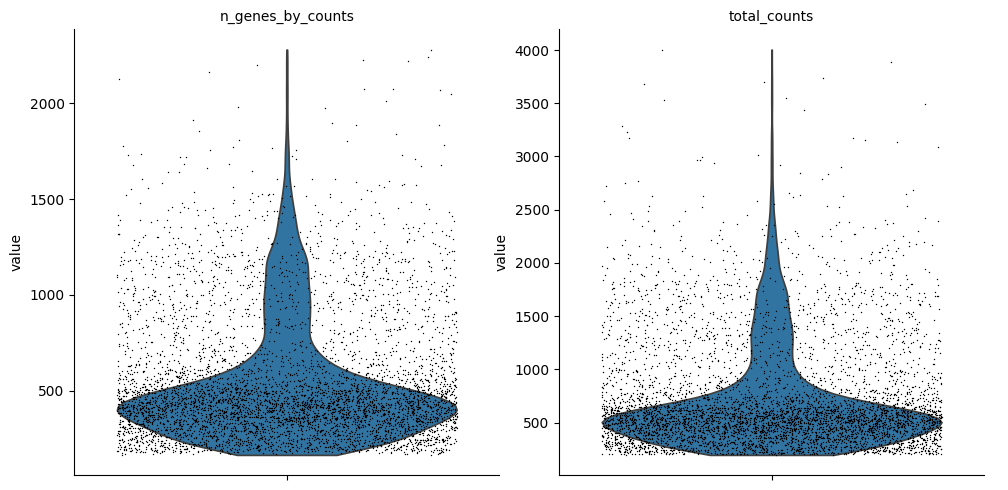

In [25]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)